In [48]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML


In [49]:
# Set all the Constants
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50


In [50]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Rice Leaf Disease",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 119 files belonging to 3 classes.


In [51]:
class_names = dataset.class_names
class_names


['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [54]:
len(dataset)

4

In [55]:
4*32

128

In [57]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())


(32, 256, 256, 3)
[0 2 2 1 0 1 0 1 2 0 0 1 2 1 0 2 0 2 2 0 2 0 1 0 1 0 0 0 1 2 0 1]


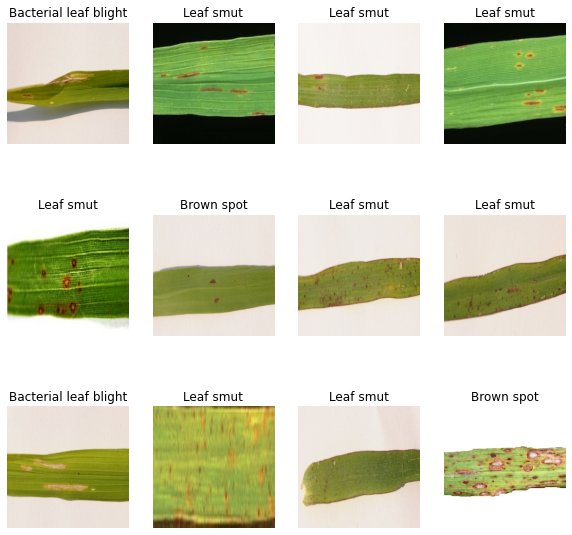

In [53]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")


In [58]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [59]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [60]:
len(train_ds)


3

In [61]:
len(val_ds)


0

In [62]:
len(test_ds)


1

In [63]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [64]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])


In [65]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])


In [66]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [67]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [69]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])


In [70]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)


Epoch 1/50
3/3 [==============================] - 14s 3s/step - loss: 1.1071 - accuracy: 0.3218
Epoch 2/50
3/3 [==============================] - 10s 3s/step - loss: 1.0979 - accuracy: 0.3333
Epoch 3/50
3/3 [==============================] - 10s 3s/step - loss: 1.0976 - accuracy: 0.3793
Epoch 4/50
3/3 [==============================] - 11s 3s/step - loss: 1.0952 - accuracy: 0.3448
Epoch 5/50
3/3 [==============================] - 10s 3s/step - loss: 1.0861 - accuracy: 0.4138
Epoch 6/50
3/3 [==============================] - 10s 4s/step - loss: 1.0794 - accuracy: 0.3793
Epoch 7/50
3/3 [==============================] - 11s 4s/step - loss: 1.0640 - accuracy: 0.4713
Epoch 8/50
3/3 [==============================] - 11s 3s/step - loss: 1.0582 - accuracy: 0.3908
Epoch 9/50
3/3 [==============================] - 10s 4s/step - loss: 1.0500 - accuracy: 0.4598
Epoch 10/50
3/3 [==============================] - 10s 3s/step - loss: 1.0087 - accuracy: 0.4713
Epoch 11/50
3/3 [======================

In [71]:
scores = model.evaluate(test_ds)


1/1 [==============================] - 2s 2s/step - loss: 0.2525 - accuracy: 0.9375


In [72]:
scores


[0.25251421332359314, 0.9375]